In [1]:
%load_ext autoreload
%autoreload 2
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["GEOMSTATS_BACKEND"] = "pytorch"

### Visualize Sphere & Torus data

In [2]:
from datasets.synthetic import load_s2_synthetic as load_sphere

embedding_dim = 3
rot = torch.eye(3)
n_times = 80
radius = 1
distortion_amp = 0.5
noise_var = 1e-4

sphere_data, labels = load_sphere(rot, n_times,radius, distortion_amp,embedding_dim, noise_var)

INFO: Using pytorch backend


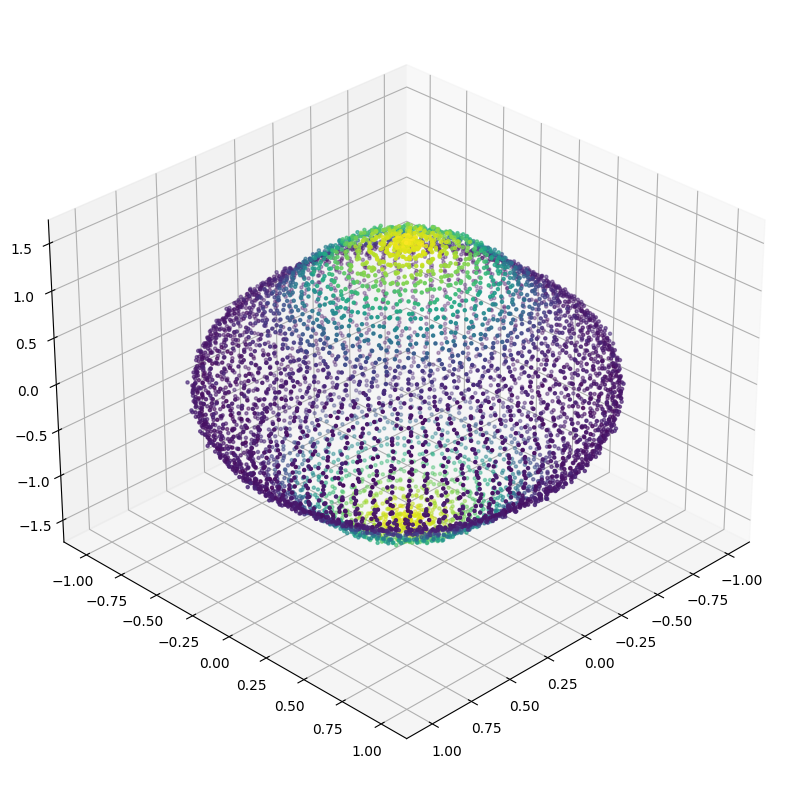

In [3]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

x = sphere_data[:,0]
y = sphere_data[:,1]
z = sphere_data[:,2]

ax.scatter3D(x, y, z, s=5, c = np.linalg.norm(sphere_data,axis=1))

ax.view_init(elev=30, azim=45, roll=0)

In [25]:
from datasets.synthetic import load_t2_synthetic as load_torus

embedding_dim = 3
rot = torch.eye(3)
n_times = 200
major_radius = 2
minor_radius = 1
distortion_amp = 0.2
noise_var = 1e-4

torus_data, labels = load_torus(rot, n_times,major_radius, minor_radius, distortion_amp,embedding_dim, noise_var)

x = torus_data[:,0]
y = torus_data[:,1]
z = torus_data[:,2]

norms = np.linalg.norm(torus_data,axis=1)

In [26]:
labels

,thetas,psis
0,0.000000,0.000000
1,0.000000,0.031574
2,0.000000,0.063148
3,0.000000,0.094721
4,0.000000,0.126295
...,...,...
39995,6.283185,6.156890
39996,6.283185,6.188464
39997,6.283185,6.220038
39998,6.283185,6.251612


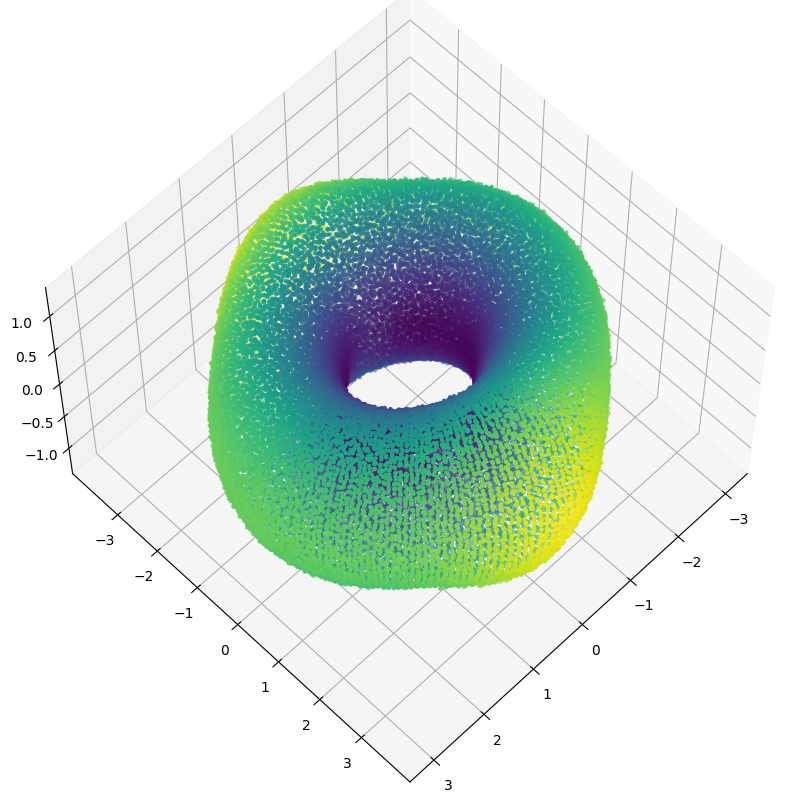

In [9]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')


ax.scatter3D(x, y, z, s=5, c = norms)
ax.view_init(elev=60, azim=45, roll=0)

In [7]:
thetas = torch.linspace(0, torch.pi, n_times)

phis = torch.linspace(0, 2 * torch.pi, n_times)

angles = torch.cartesian_prod(thetas, phis)

In [8]:
angles.shape

torch.Size([6400, 2])

In [16]:
thetas = angles[:,0]
phis = angles[:,1]